% FIR filter design with Python and SciPy
% Matti Pastell
% 15th April 2013

# Introduction

This an example of a script that can be published using
[Pweave](http://mpastell.com/pweave). The script can be executed
normally using Python or published to HTML with Pweave
Text is written in markdown in lines starting with "`#'` " and code
is executed and results are included in the published document.
The concept is similar to
publishing documents with [MATLAB](http://mathworks.com) or using
stitch with [Knitr](http://http://yihui.name/knitr/demo/stitch/).

Notice that you don't need to define chunk options (see
[Pweave docs](http://mpastell.com/pweave/usage.html#code-chunk-options)
),
but you do need one line of whitespace between text and code.
If you want to define options you can do it on using a line starting with
`#+`. just before code e.g. `#+ term=True, caption='Fancy plots.'`. 
If you're viewing the HTML version have a look at the
[source](FIR_design.py) to see the markup.

The code and text below comes mostly
from my blog post [FIR design with SciPy](http://mpastell.com/2010/01/18/fir-with-scipy/),
but I've updated it to reflect new features in SciPy. 

# FIR Filter Design

We'll implement lowpass, highpass and ' bandpass FIR filters. If
you want to read more about DSP I highly recommend [The Scientist
and Engineer's Guide to Digital Signal
Processing](http://www.dspguide.com/) which is freely available
online.

## Functions for frequency, phase, impulse and step response

Let's first define functions to plot filter
properties.



In [1]:
from pylab import *
import scipy.signal as signal
    
#Plot frequency and phase response
def mfreqz(b,a=1):
    w,h = signal.freqz(b,a)
    h_dB = 20 * log10 (abs(h))
    subplot(211)
    plot(w/max(w),h_dB)
    ylim(-150, 5)
    ylabel('Magnitude (db)')
    xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    title(r'Frequency response')
    subplot(212)
    h_Phase = unwrap(arctan2(imag(h),real(h)))
    plot(w/max(w),h_Phase)
    ylabel('Phase (radians)')
    xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    title(r'Phase response')
    subplots_adjust(hspace=0.5)

#Plot step and impulse response
def impz(b,a=1):
    l = len(b)
    impulse = repeat(0.,l); impulse[0] =1.
    x = arange(0,l)
    response = signal.lfilter(b,a,impulse)
    subplot(211)
    stem(x, response)
    ylabel('Amplitude')
    xlabel(r'n (samples)')
    title(r'Impulse response')
    subplot(212)
    step = cumsum(response)
    stem(x, step)
    ylabel('Amplitude')
    xlabel(r'n (samples)')
    title(r'Step response')
    subplots_adjust(hspace=0.5)


## Lowpass FIR filter

Designing a lowpass FIR filter is very simple to do with SciPy, all you
need to do is to define the window length, cut off frequency and the
window.

The Hamming window is defined as:
$w(n) = \alpha - \beta\cos\frac{2\pi n}{N-1}$, where $\alpha=0.54$ and $\beta=0.46$ 

The next code chunk is executed in term mode, see the [Python script](FIR_design.py) for syntax.
Notice also that Pweave can now catch multiple figures/code chunk.



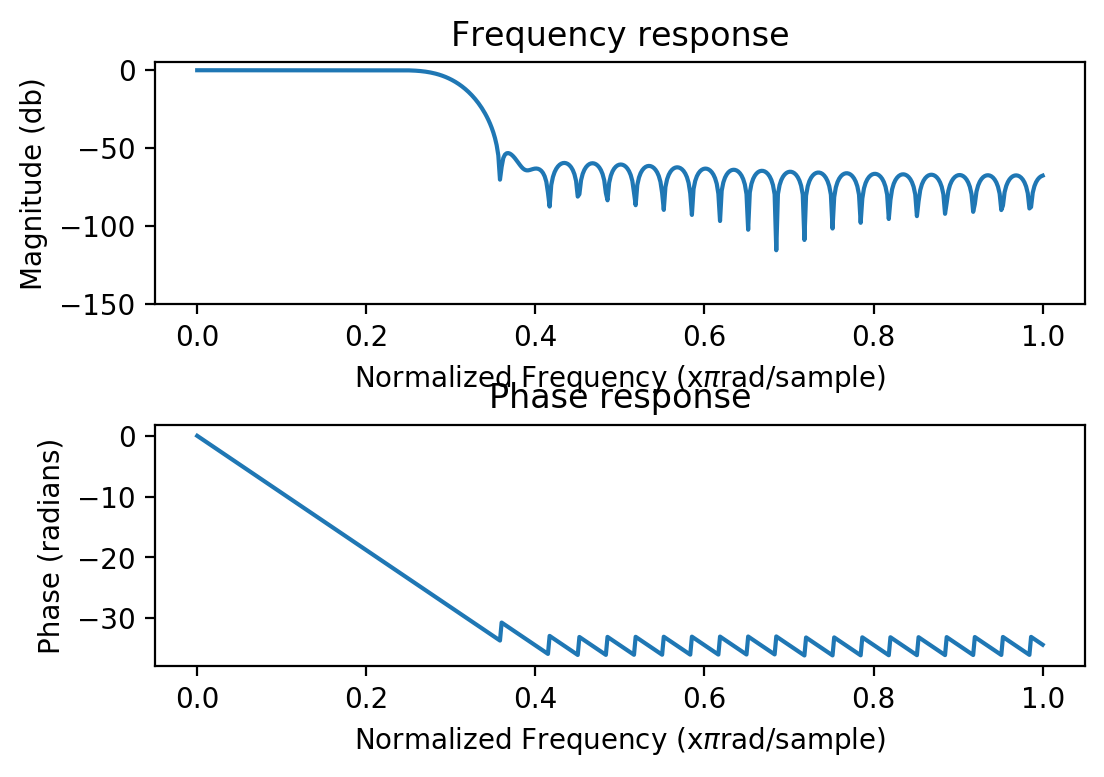

In [2]:
n = 61
a = signal.firwin(n, cutoff = 0.3, window = "hamming")
#Frequency and phase response
mfreqz(a)

In [3]:
show()
#Impulse and step response
figure(2)

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

/home/ztlevi/python/bin/pweave:29: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/home/ztlevi/python/bin/pweave:35: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


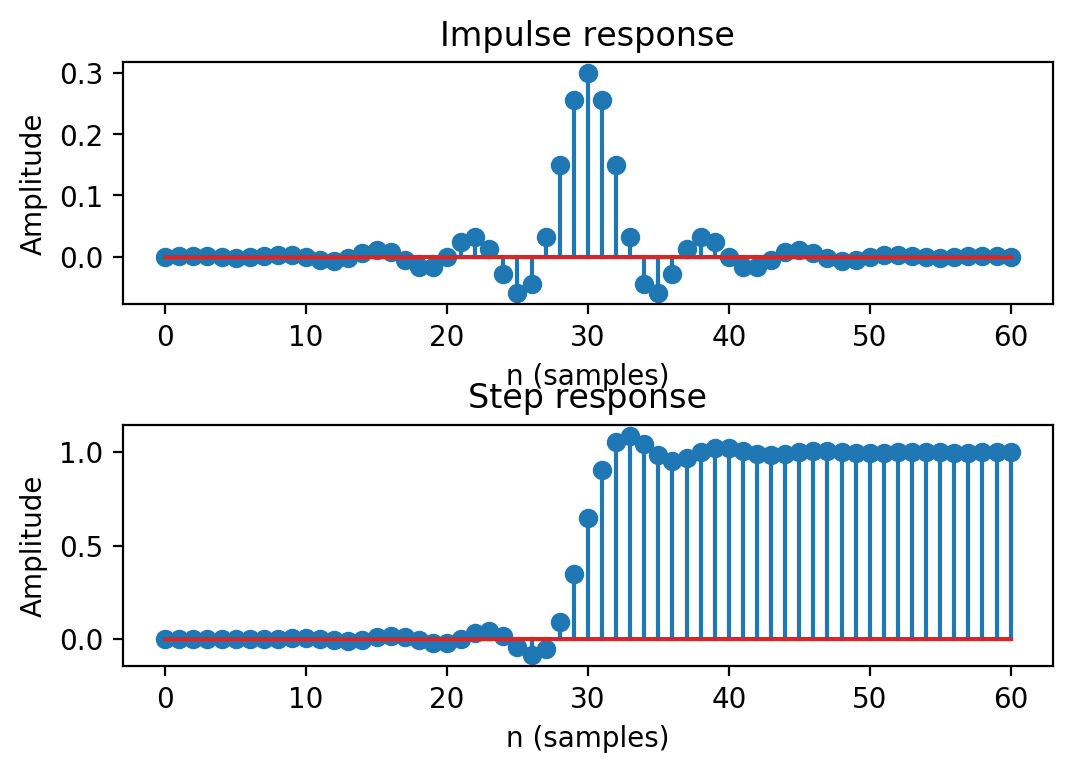

In [4]:
impz(a)

In [5]:
show()



## Highpass FIR Filter

Let's define a highpass FIR filter, if you compare to original blog
post you'll notice that it has become easier since 2009. You don't
need to do ' spectral inversion "manually" anymore!



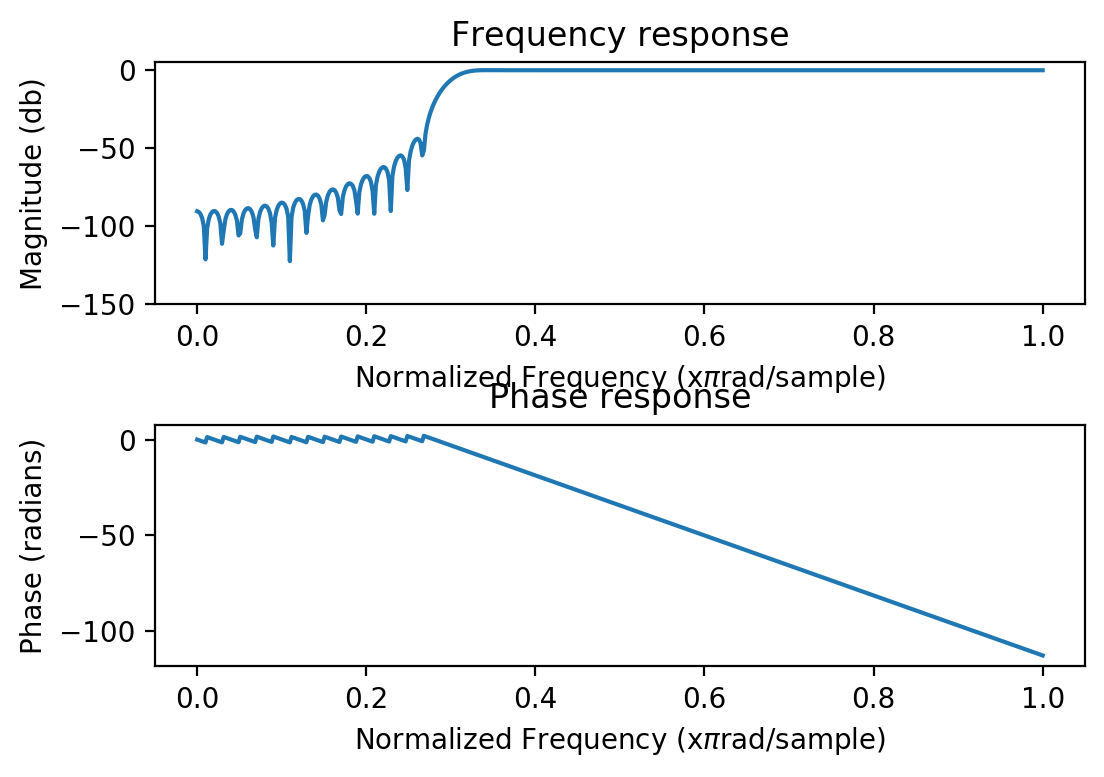

In [6]:
n = 101
a = signal.firwin(n, cutoff = 0.3, window = "hanning", pass_zero=False)
mfreqz(a)
show()


## Bandpass FIR filter

Notice that the plot has a caption defined in code chunk options.



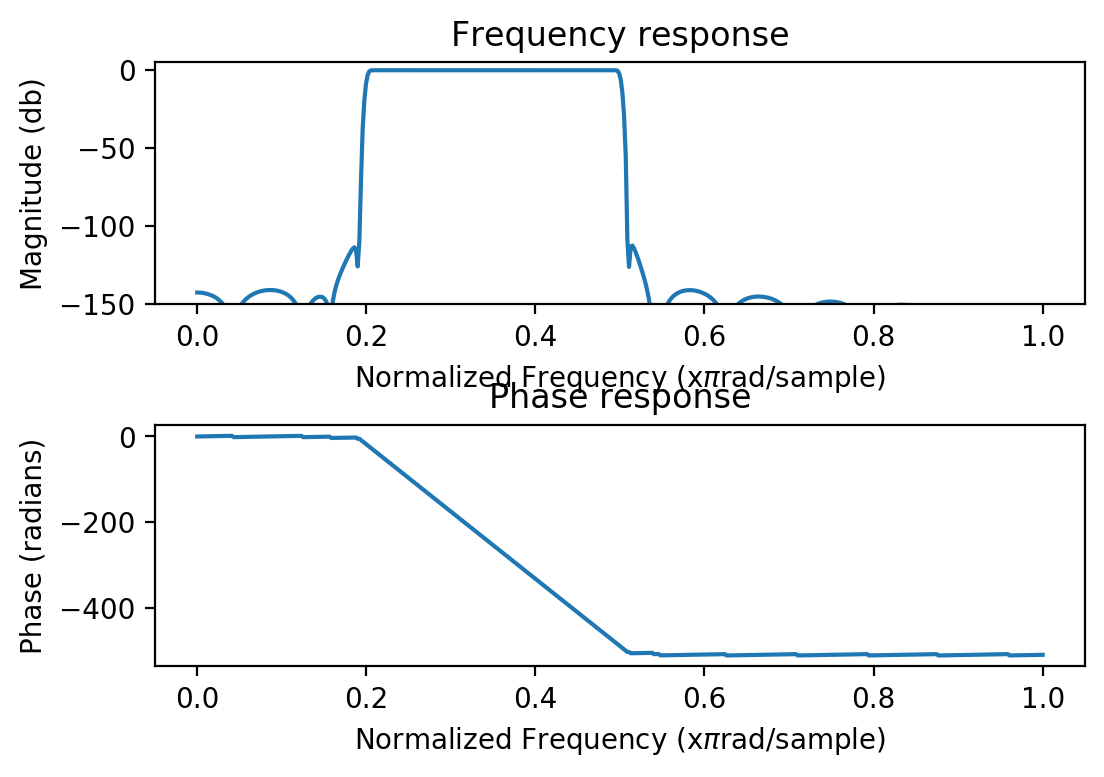

In [7]:
n = 1001
a = signal.firwin(n, cutoff = [0.2, 0.5], window = 'blackmanharris', pass_zero = False)
mfreqz(a)
show()